<a href="https://colab.research.google.com/github/antonioMachorro/arte-analitica-A01782114/blob/main/Reto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Equipo 4**

Objetivo: Visualizar las diferencias entre followers que tienen los usuarios y los dispositivos con los que se hacen los Tweets (**sources**). Asímismo, identificar las relaciones entre si un usuario está verificado o no.

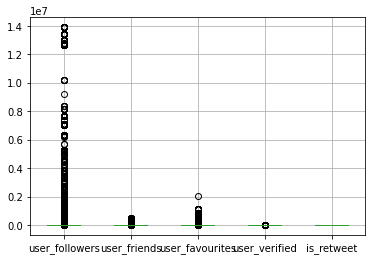

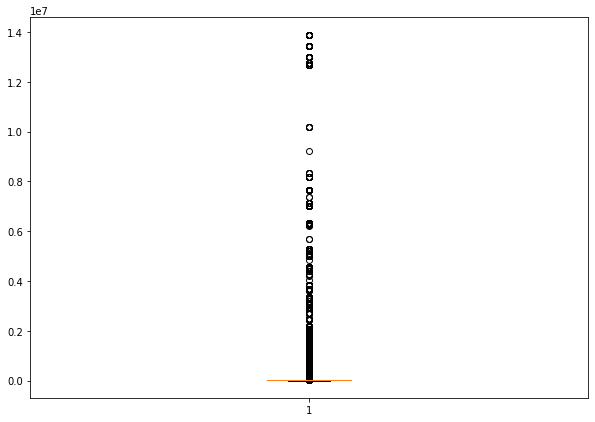

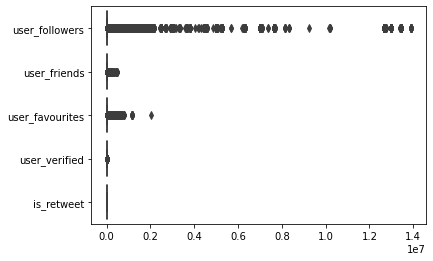

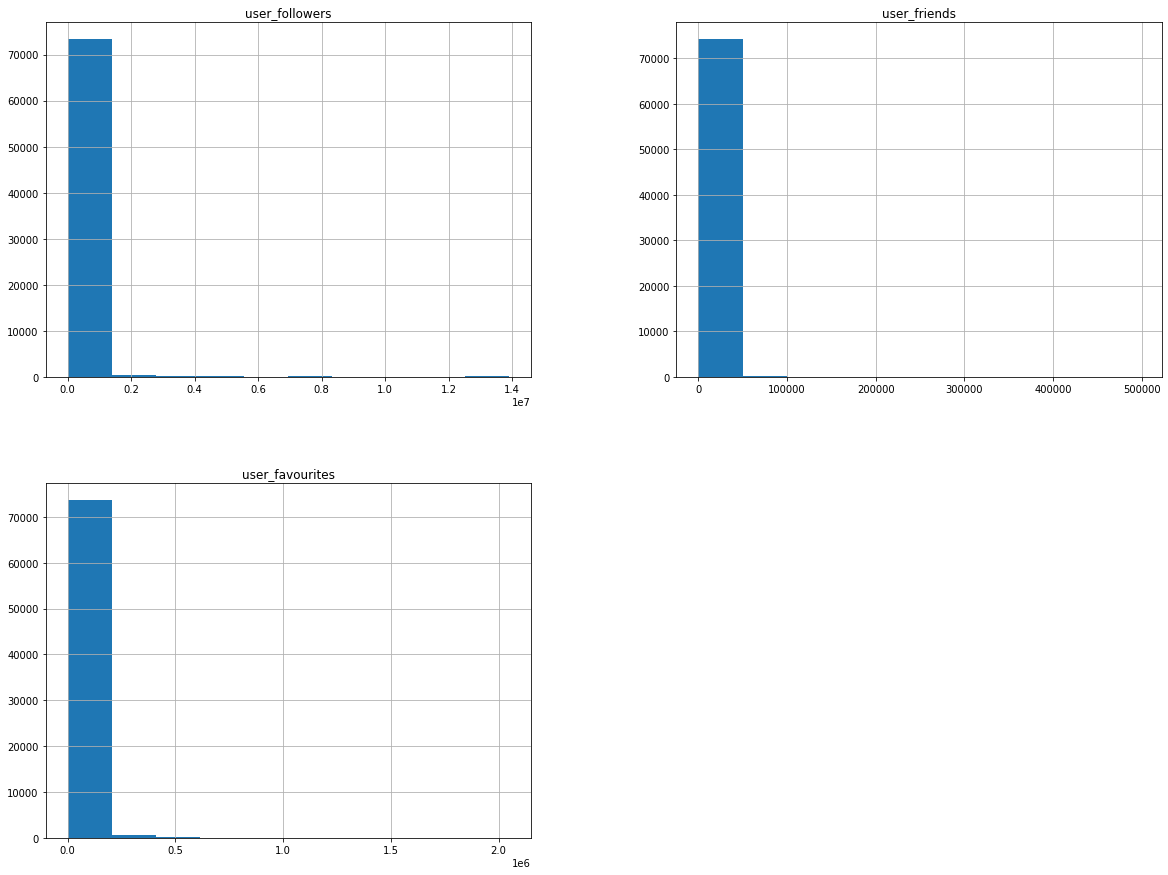

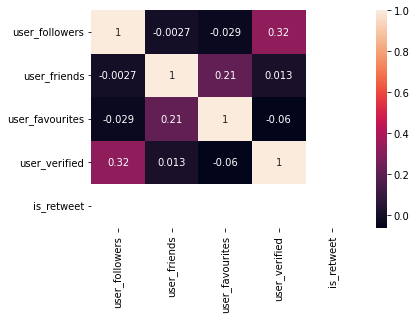

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

df = pd.read_csv('sample_data/covid19_tweets.csv')

"""Diagrama de cajas y bigotes"""
df.boxplot()

#np.random.seed(10)
#data = np.random.normal(100, 20, 200)

data = df["user_followers"]
 
fig = plt.figure(figsize =(10, 7))
 
# Creating plot
plt.boxplot(data)
 
# show plot
plt.show()

sns.boxplot(data=df, orient="h")

"""Histogramas"""
df.hist(figsize=(20,15))
plt.show()

"""Mapas de calor"""
corrmat = df.corr()
sns.heatmap(corrmat, annot=True)
plt.show()


In [ ]:
df2 = len(df[df["user_friends"] > 1000])
df2

27206

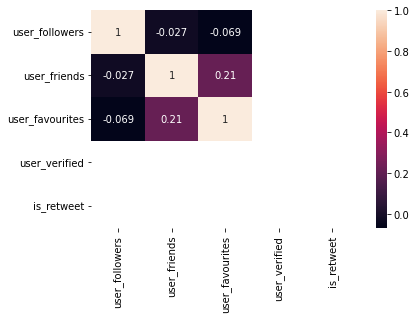

In [ ]:
dfq = df[df["user_verified"] == True]
corrmat = dfq.corr()
sns.heatmap(corrmat, annot=True)
plt.show()

<Axes: >

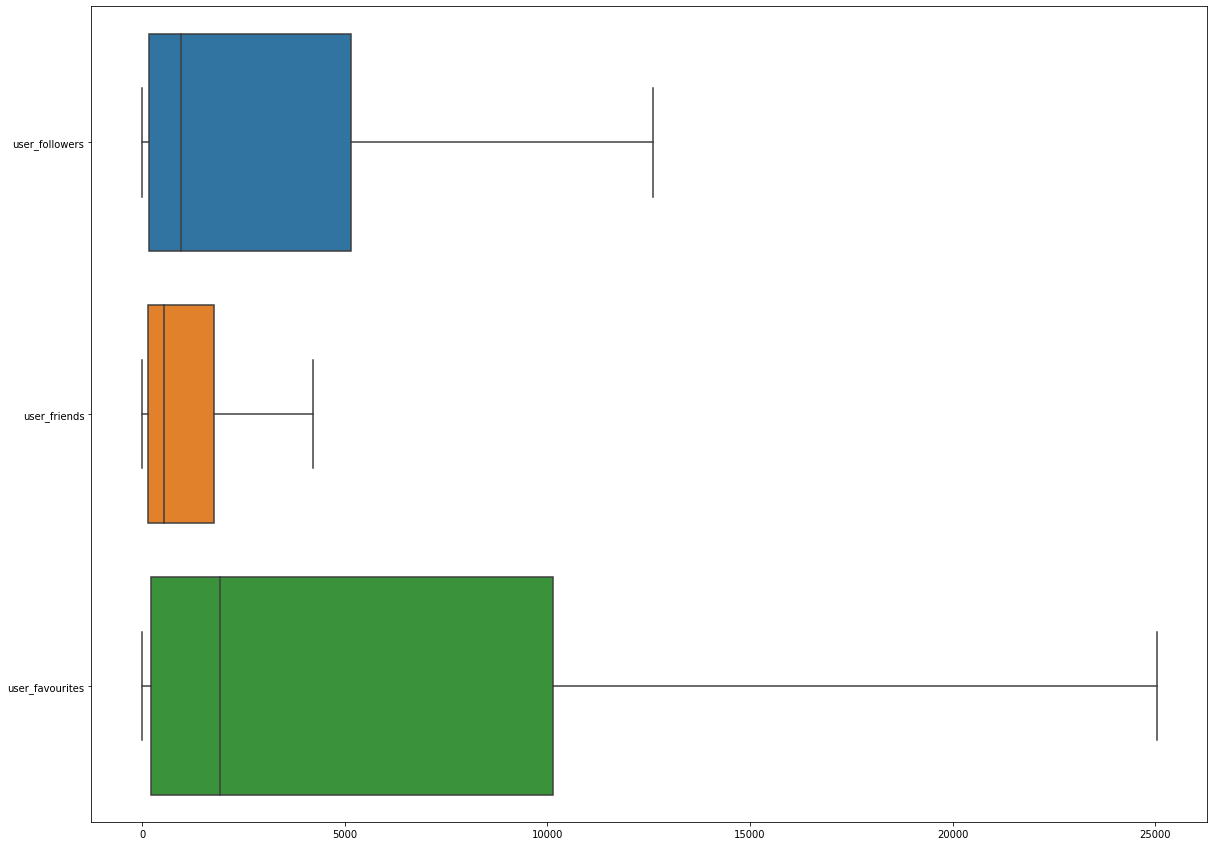

In [ ]:
dfq = df[["user_followers", "user_friends", "user_favourites"]]
dfq
plt.figure(figsize =(20, 15))
sns.boxplot(data=dfq, orient="h",showfliers = False)

In [ ]:
df['source'].unique()

array(['Twitter for iPhone', 'Twitter for Android', 'Twitter Web App',
       'Buffer', 'TweetDeck', 'Twitter for iPad', 'Africa Newsroom',
       'Blood Donors India', 'TweetCaster for Android',
       'Alexander Higgins', 'IFTTT', 'Hootsuite Inc.', 'Sprout Social',
       'Sprinklr', 'assarofficial', 'IAMBLOG2TWITTER', 'CrowdControlHQ',
       'COVID19-Updates', 'EveryoneSocial', 'Dynamic Signal', 'Instagram',
       'TweetCaster for iOS', 'GlobalPandemic.NET', 'Venrap Radio',
       'HeyOrca', 'Twitter for Advertisers', 'Paper.li',
       'Twitter Media Studio', 'Twitter for Mac', 'dlvr.it',
       'Cheap Bots, Done Quick!', 'Prof. Shanku', 'LaterMedia',
       'SEMrush Social Media Tool', 'Twitterrific for iOS',
       "Sebastian's Twitter Bot", 'Threader_client', 'COVID19FactoidBot',
       'PwC UK SMART', 'tweet pro stiff', 'UK COVID-19 Alerts',
       'Resistbot Open Letters', 'preprint-alert', 'ContentStudio.io',
       'Peeping Moon', 'TweetAutomaticos', 'Orlo', 'AgoraPulse Ma

In [ ]:
df['source'].value_counts().nlargest(5)

Twitter Web App        56891
Twitter for Android    40179
Twitter for iPhone     35472
TweetDeck               8543
Hootsuite Inc.          7321
Name: source, dtype: int64

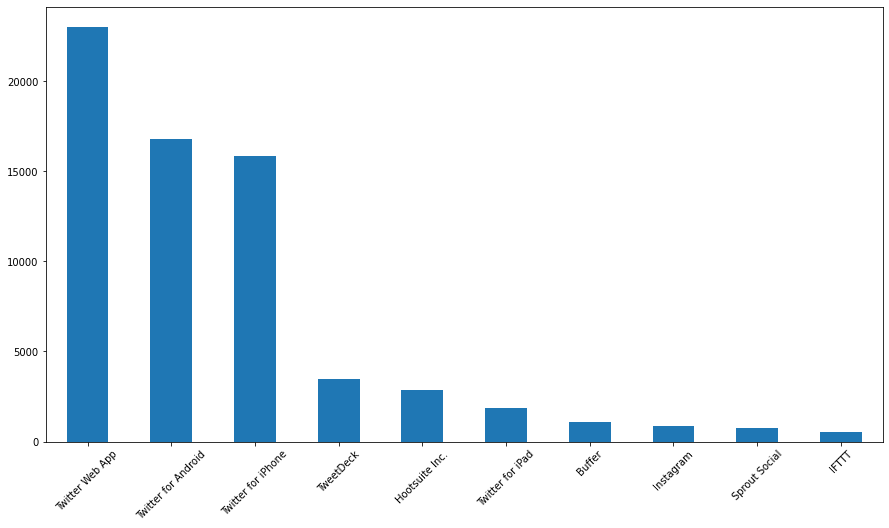

In [ ]:
plt.figure(figsize=(15,8))
df['source'].value_counts().nlargest(10).plot(kind='bar')
plt.xticks(rotation=45)
plt.show()

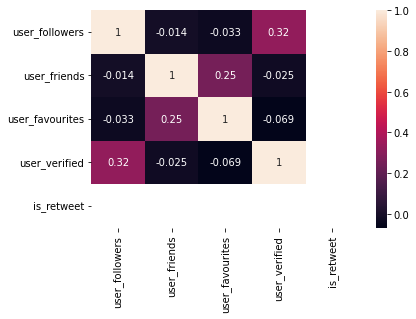

In [ ]:
df2 = df[df["source"] == "Twitter Web App"]
corrmat = df2.corr()
sns.heatmap(corrmat, annot=True)
plt.show()

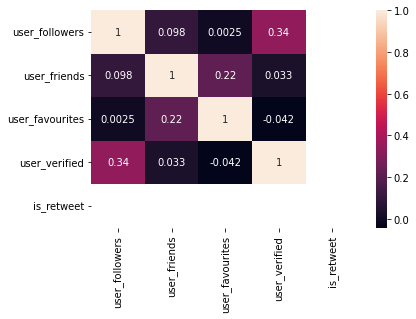

In [ ]:
df2 = df[df["source"] == "Twitter for Android"]
corrmat = df2.corr()
sns.heatmap(corrmat, annot=True)
plt.show()

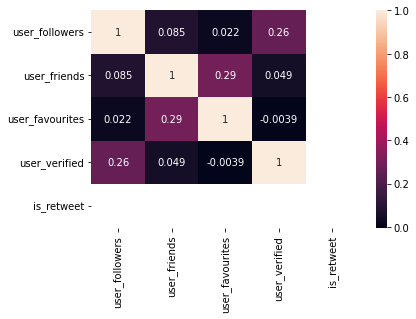

In [ ]:
df2 = df[df["source"] == "Twitter for iPhone"]
corrmat = df2.corr()
sns.heatmap(corrmat, annot=True)
plt.show()

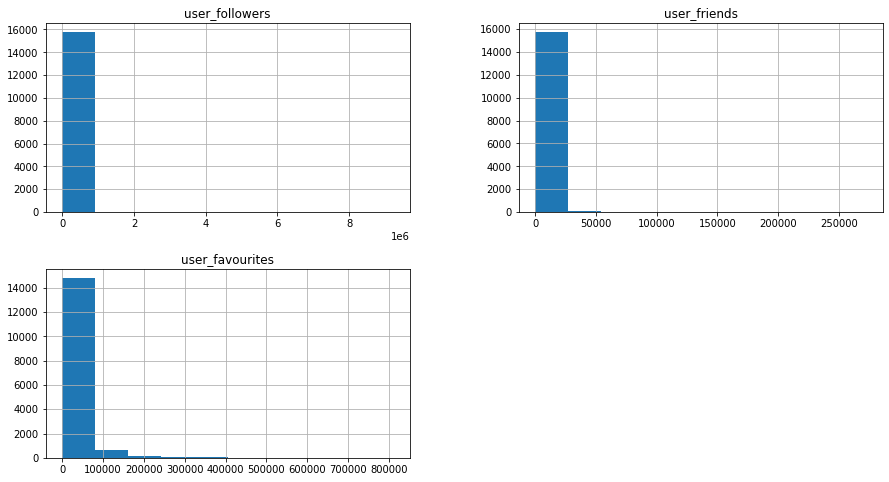

In [ ]:
df2 = df[df["source"] == "Twitter for iPhone"]
df2.hist(figsize=(15,8))
plt.show()

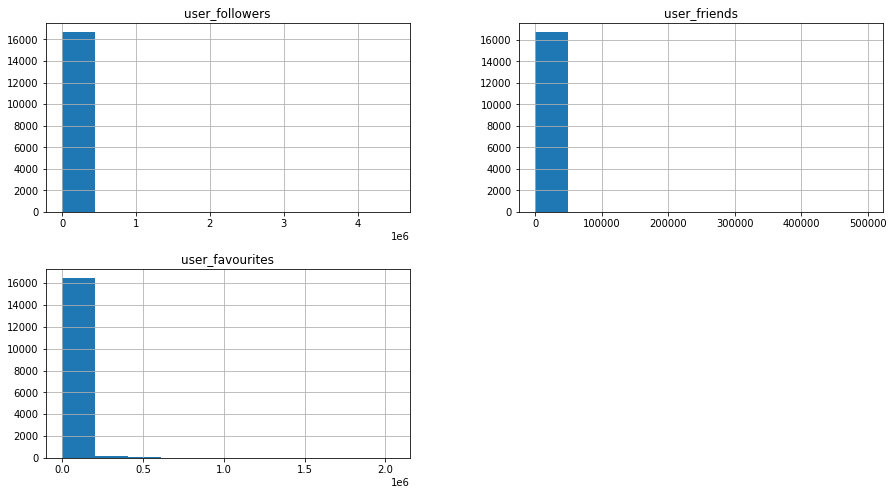

In [ ]:
df2 = df[df["source"] == "Twitter for Android"]
df2.hist(figsize=(15,8))
plt.show()

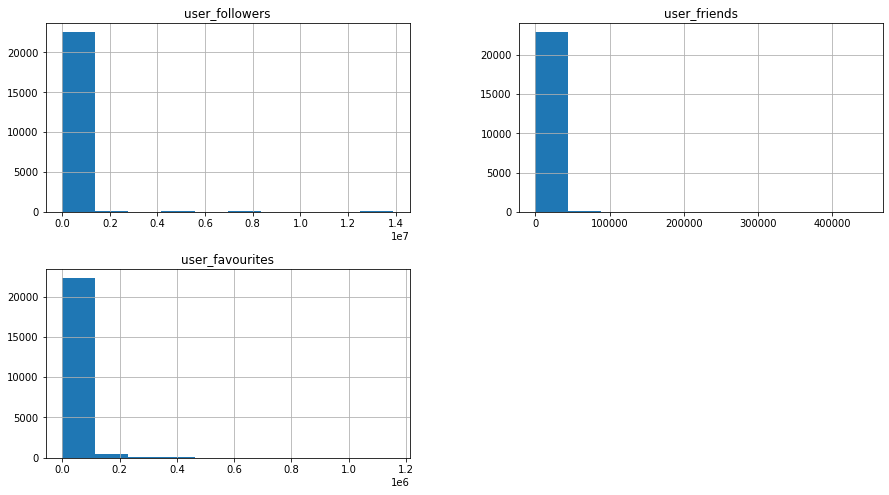

In [ ]:
df2 = df[df["source"] == "Twitter Web App"]
df2.hist(figsize=(15,8))
plt.show()

**Objetivo Antonio Machorro A01782114**

Se intentará visualizar la relación entre usuarios verificados y números altos de seguidores en las tres plataformas primarias de Twitter (**WebApp**, **Android** y **iPhone** respectivamente), buscando la plataforma con mayor número de usuarios no verificados con un mayor número de seguidores. Al ubicar estos usuarios, identificar las palabras más comúnes para analizar el contenido de las publicaciones de dichos usuarios.

In [ ]:
dq = df[["user_followers", "user_verified", "source"]]
dqw = dq[dq["source"] == "Twitter for Android"]
dqw

,user_followers,user_verified,source
1,2253,True,Twitter for Android
2,9275,False,Twitter for Android
4,101009,False,Twitter for Android
8,25,False,Twitter for Android
15,274,False,Twitter for Android
...,...,...,...
74416,1676,False,Twitter for Android
74423,663,False,Twitter for Android
74427,0,False,Twitter for Android
74428,52,False,Twitter for Android


<Axes: ylabel='user_followers'>

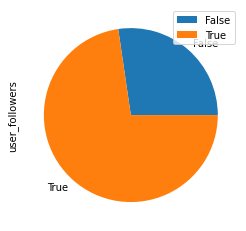

In [ ]:
dqw.groupby(["user_verified"]).sum().plot(kind='pie', y="user_followers")

In [ ]:
dq = df[["user_followers", "user_verified", "source"]]
dqw = dq[dq["source"] == "Twitter for iPhone"]
dqw

,user_followers,user_verified,source
0,624,False,Twitter for iPhone
3,197,False,Twitter for iPhone
9,55201,False,Twitter for iPhone
16,3987,False,Twitter for iPhone
20,292,False,Twitter for iPhone
...,...,...,...
179056,58,False,Twitter for iPhone
179065,35,False,Twitter for iPhone
179066,7890,True,Twitter for iPhone
179095,1275,False,Twitter for iPhone


<Axes: ylabel='user_followers'>

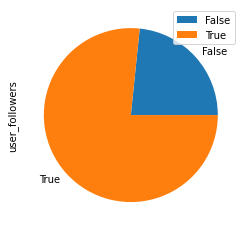

In [ ]:
dqw.groupby(["user_verified"]).sum().plot(kind='pie', y="user_followers")

In [ ]:
dq = df[["user_followers", "user_verified", "source"]]
dqw = dq[dq["source"] == "Twitter Web App"]
dqw

,user_followers,user_verified,source
5,1180,False,Twitter Web App
10,8,False,Twitter Web App
11,241,False,Twitter Web App
12,0,False,Twitter Web App
13,830,False,Twitter Web App
...,...,...,...
179094,979,False,Twitter Web App
179098,61,False,Twitter Web App
179099,128,False,Twitter Web App
179102,251,False,Twitter Web App


<Axes: ylabel='user_followers'>

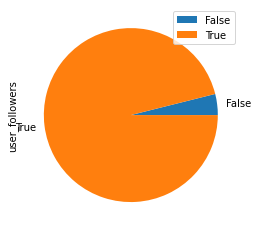

In [ ]:
dqw.groupby(["user_verified"]).sum().plot(kind='pie', y="user_followers")

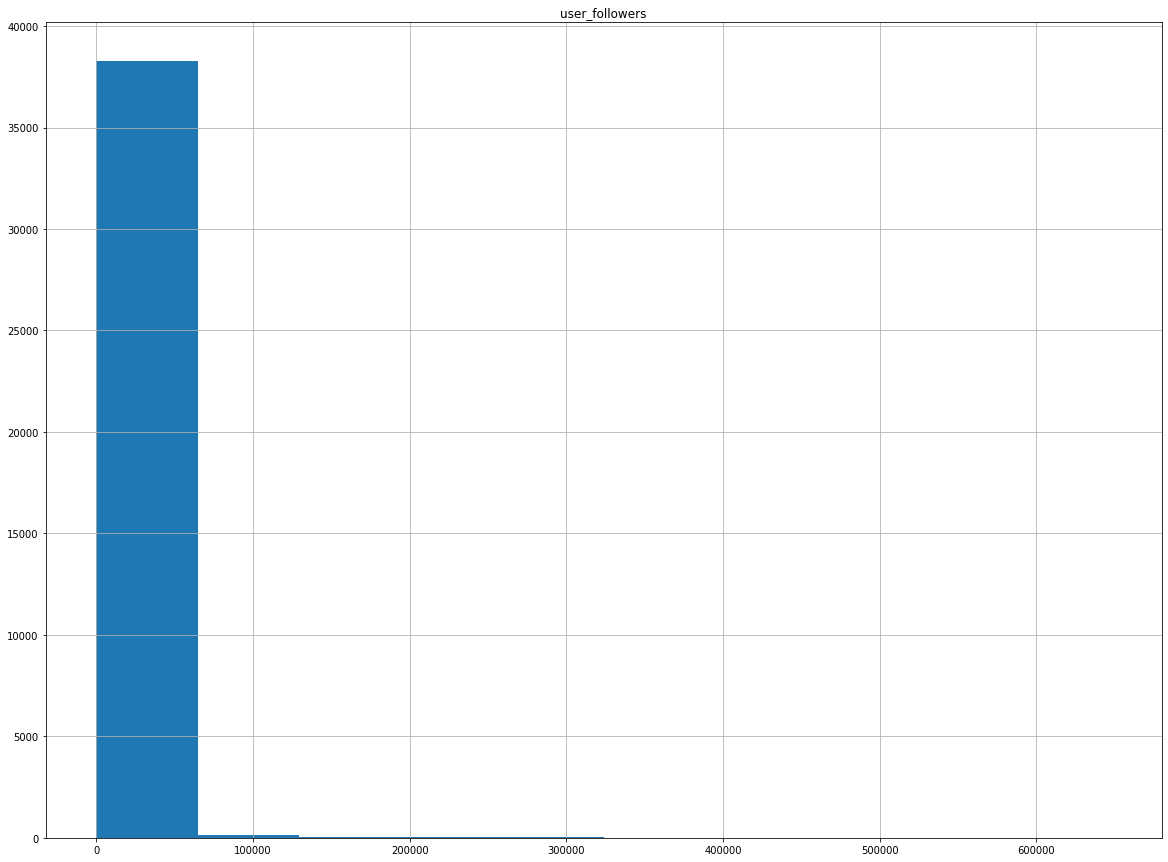

In [ ]:
dq = df[["user_followers", "user_verified", "source", "text"]]
dqw = dq[dq["source"] == "Twitter for Android"]
dqwno_verified = dqw[dqw["user_verified"] == False]
dqwno_verified.hist(figsize=(20,15))
plt.show()

In [ ]:
#Buscar los no verificados con mas followers y su tweet
dataset = dqwno_verified[dqwno_verified["user_followers"] > 100000]
dataset.sort_values(by="user_followers")

,user_followers,user_verified,source,text
117548,100346,False,Twitter for Android,1920 discharged &amp; 09 deaths reported today...
110223,100381,False,Twitter for Android,@JonBelsher @RMCarpiano @RasuShrestha @CarolFo...
9840,100426,False,Twitter for Android,"One of the world's oldest religious festivals,..."
4,101009,False,Twitter for Android,25 July : Media Bulletin on Novel #CoronaVirus...
30156,101406,False,Twitter for Android,"Today, as like many of us who have celebrated ..."
...,...,...,...,...
160624,442047,False,Twitter for Android,"When you go for shopping, take extra precautio..."
159959,442047,False,Twitter for Android,Continue to take extra precaution to prevent t...
1129,635614,False,Twitter for Android,Actor @VishalKOfficial and his father Mr.G.K.R...
30825,635685,False,Twitter for Android,Be Alert Next month is Peak in Tamilnadu #Coro...


In [ ]:
def my_tokenizer(text):
  return text.split() if text != None else[]

In [ ]:
tokens = dataset["text"].map(my_tokenizer).sum()
tokens

['25',
 'July',
 ':',
 'Media',
 'Bulletin',
 'on',
 'Novel',
 '#CoronaVirusUpdates',
 '#COVID19',
 '@kansalrohit69',
 '@DrSyedSehrish',
 '@airnewsalerts',
 '@ANI…',
 'https://t.co/MN0EEcsJHh',
 'Actor',
 '@VishalKOfficial',
 'and',
 'his',
 'father',
 'Mr.G.K.Reddy',
 'tested',
 'positive',
 'for',
 '#Covid19',
 '15/20',
 'days',
 'back..',
 'While',
 '#Vishal',
 "'s…",
 'https://t.co/dKSwxswcmU',
 'Actor',
 '@VishalKOfficial',
 'and',
 'his',
 'father',
 'Mr.G.K.Reddy',
 'tested',
 'positive',
 'for',
 '#Covid19',
 '15/20',
 'days',
 'back..',
 'While',
 '#Vishal',
 "'s…",
 'https://t.co/8Balp1rT3I',
 'Former',
 '#CMSD',
 'director',
 'Md',
 'Shahidullah',
 'dies',
 'of',
 '#Covid19',
 'https://t.co/rhwABjVeAO',
 '#BiharFightsCorona',
 'Update',
 'of',
 'the',
 'day.',
 '➡️',
 '1021',
 'New',
 'cases',
 'have',
 'been',
 'reported',
 'so',
 'far',
 'on',
 '24th',
 'July.',
 '1782',
 'cases',
 'of',
 '23r…',
 'https://t.co/2wl5OMZ3v7',
 '#Xavi',
 'tests',
 'positive',
 'for',
 '#Covid

In [ ]:
from collections import Counter
counter = Counter(tokens)
counter.most_common(20)

[('of', 49),
 ('the', 42),
 ('#COVID19', 41),
 ('#Covid19', 37),
 ('to', 35),
 ('in', 31),
 ('have', 23),
 ('on', 22),
 ('cases', 22),
 ('and', 21),
 ('for', 21),
 ('a', 14),
 ('more', 13),
 ('your', 13),
 ('is', 13),
 ('I', 12),
 ('&amp;', 11),
 ('been', 10),
 ('reported', 10),
 ('with', 10)]

In [ ]:
from spacy.lang.en.stop_words import STOP_WORDS
def remove_stopwords(tokens):
  return [t for t in tokens if t not in STOP_WORDS]

counter = Counter(remove_stopwords(tokens))
counter.most_common(20)

[('#COVID19', 41),
 ('#Covid19', 37),
 ('cases', 22),
 ('I', 12),
 ('&amp;', 11),
 ('reported', 10),
 ('#BiharFightsCorona', 8),
 ('Update', 8),
 ('day.', 8),
 ('far', 8),
 ('||', 8),
 ('deaths', 8),
 ('+ve', 7),
 ('August.', 7),
 ('#COVID19.', 6),
 ('#COVID19:', 6),
 ('toll', 6),
 ('2020', 6),
 ('11:30', 6),
 ('PM', 6)]

<Axes: xlabel='token'>

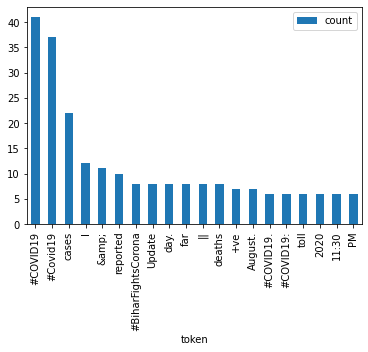

In [ ]:
freq_df = pd.DataFrame.from_records(counter.most_common(20),
                                    columns=['token', 'count'])
freq_df.plot(kind='bar', x='token')

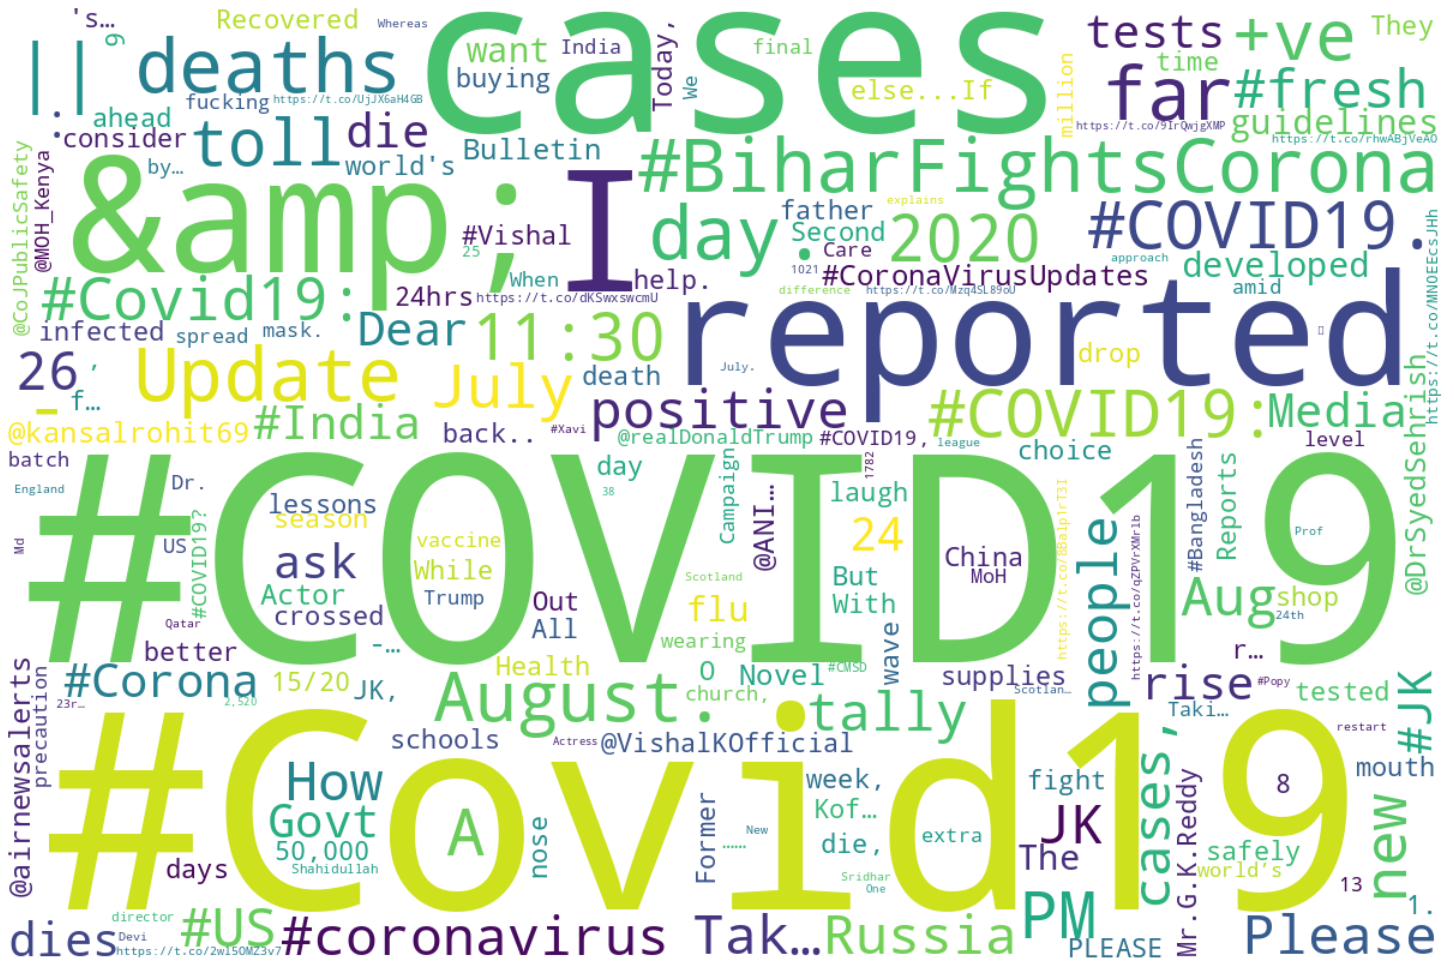

In [ ]:
from wordcloud import WordCloud

def worldcloud(counter):
  wc = WordCloud(width=1200, height=800,
                  background_color="white",
                  max_words=200)
  wc.generate_from_frequencies(counter)

  fig=plt.figure(figsize=(20,20))
  plt.imshow(wc, interpolation='bilinear')
  plt.axis("off")
  plt.tight_layout(pad=0)
  plt.show()

worldcloud(counter)

**Objetivo Marco Iván Pacheco Martínez**

identificar patrones de comportamiento y opiniones sobre la pandemia de COVID-19 en función de la ubicación geográfica de los usuarios. Además de ver la relación entre el número de seguidores y amigos de los usuarios y su influencia en las opiniones y comportamientos relacionados con el COVID-19 y con relación a las vacunas. 

In [ ]:
# Verificar los valores únicos de user_location
print(df['user_location'].unique())

['astroworld' 'New York, NY' 'Pewee Valley, KY' ...
 'WhereverMyImaginationDecides' 'On a soapbox' '😷 #stayathome']


In [ ]:
# Contar el número de tweets por ubicación geográfica de los usuarios
location_counts = df['user_location'].value_counts()
print(location_counts)

India                  1496
United States          1172
New Delhi, India        669
Washington, DC          589
Mumbai, India           554
                       ... 
Sheltering in Place       1
NiggaBalls👁️              1
Kaduna Nigeria            1
ajmer                     1
😷 #stayathome             1
Name: user_location, Length: 14622, dtype: int64


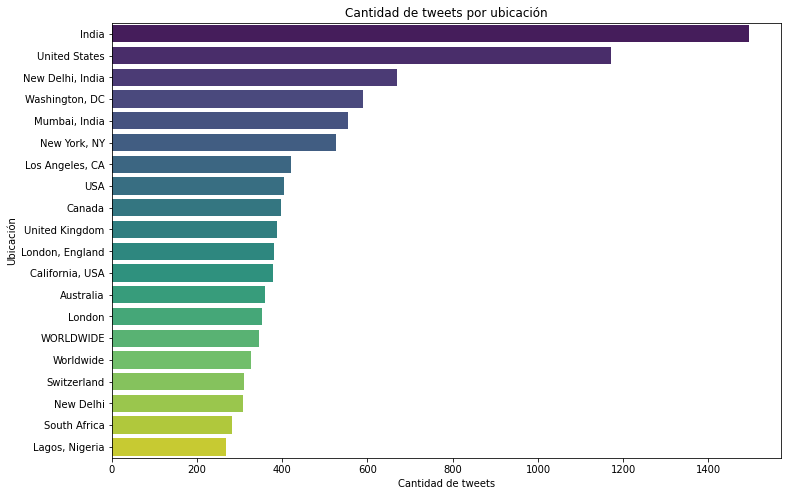

In [ ]:
tweets_geo = df.dropna(subset=['user_location'])
tweets_geo_count = tweets_geo.groupby(['user_location'])['text'].count().reset_index(name='count')
tweets_geo_count = tweets_geo_count.sort_values('count', ascending=False).head(20)

plt.figure(figsize=(12, 8))
sns.barplot(data=tweets_geo_count, x='count', y='user_location', palette='viridis')
plt.title('Cantidad de tweets por ubicación')
plt.xlabel('Cantidad de tweets')
plt.ylabel('Ubicación')
plt.show()

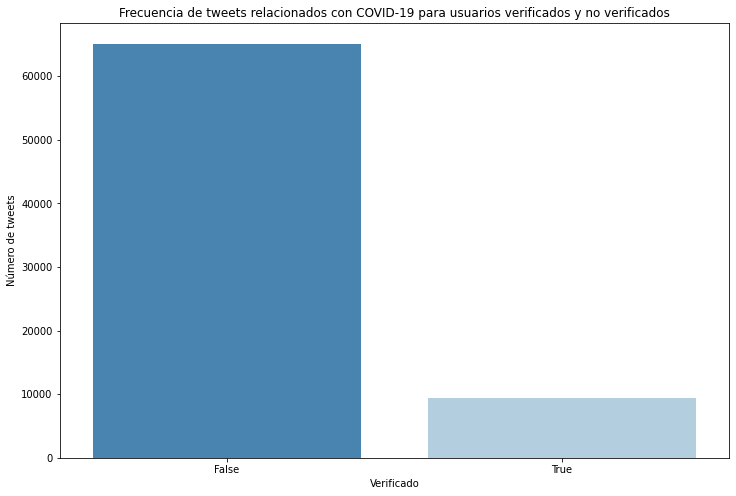

In [ ]:
verified_counts = df.groupby(['user_verified'])['text'].count()
plt.figure(figsize=(12, 8))
sns.barplot(x=verified_counts.index, y=verified_counts.values, palette="Blues_r")
plt.title("Frecuencia de tweets relacionados con COVID-19 para usuarios verificados y no verificados")
plt.xlabel("Verificado")
plt.ylabel("Número de tweets")
plt.show()

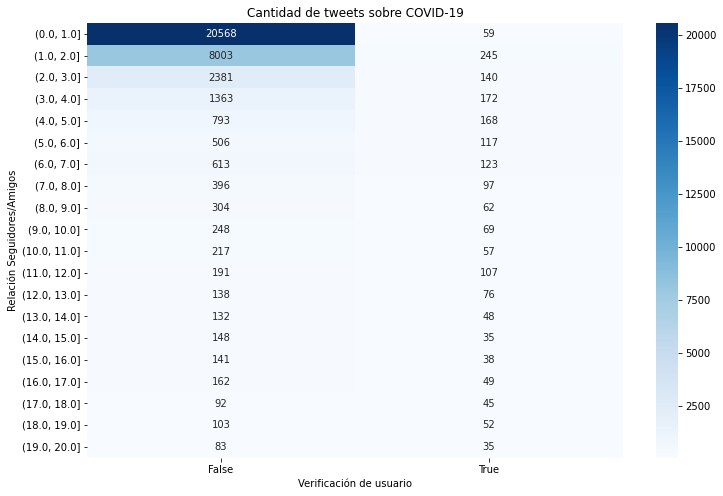

In [ ]:
#4
df['follower_friend_ratio'] = df['user_followers'] / df['user_friends']
verified_ratio_mean = df[df['user_verified'] == True]['follower_friend_ratio'].mean()
unverified_ratio_mean = df[df['user_verified'] == False]['follower_friend_ratio'].mean()

tweets_covid = df[df['text'].str.contains('covid|coronavirus', case=False)]
follower_friend_bins = pd.cut(tweets_covid['follower_friend_ratio'], bins=np.linspace(0, 20, 21))
tweets_covid_pivot = tweets_covid.pivot_table(values='text', index=follower_friend_bins, columns='user_verified', aggfunc='count')
plt.figure(figsize = (12,8))
sns.heatmap(tweets_covid_pivot, cmap='Blues', annot=True, fmt='.0f')
plt.title('Cantidad de tweets sobre COVID-19')
plt.xlabel('Verificación de usuario')
plt.ylabel('Relación Seguidores/Amigos')
plt.show()

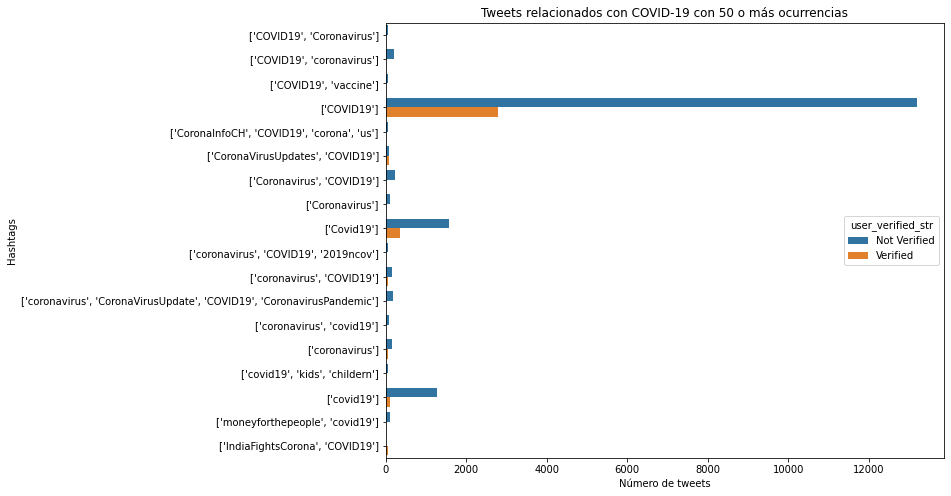

In [ ]:
#5
df['user_verified_str'] = df['user_verified'].apply(lambda x: 'Verified' if x else 'Not Verified')

# Filtrar los tweets
df = df[df['text'].str.contains('covid|coronavirus|pandemic', case=False)]
hashtag_counts = df.groupby(['user_verified_str', 'hashtags'])['hashtags'].count().reset_index(name='count')

# filtrar los hashtags con una cantidad mínima de ocurrencias
min_count = 50
hashtag_counts = hashtag_counts[hashtag_counts['count'] >= min_count]

# Barplot verificación de tweets
plt.figure(figsize=(10, 8))
sns.barplot(x='count', y='hashtags', hue='user_verified_str', data=hashtag_counts)
plt.xlabel('Número de tweets')
plt.ylabel('Hashtags')
plt.title(f'Tweets relacionados con COVID-19 con {min_count} o más ocurrencias')
plt.show()

In [ ]:
keywords = ["coronavirus", "covid", "pandemia", "vacuna", "cuarentena"]
covid_tweets = df[df["text"].str.contains('|'.join(keywords), case=False)]


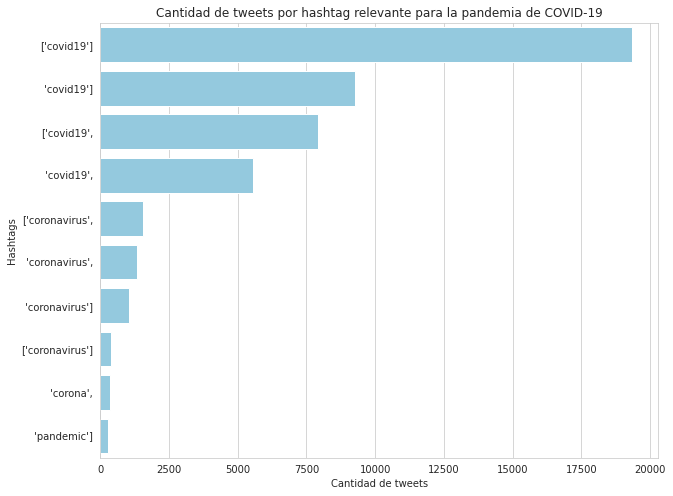

<bound method Axes.set of <Axes: xlabel='Cantidad de tweets', ylabel='index'>>

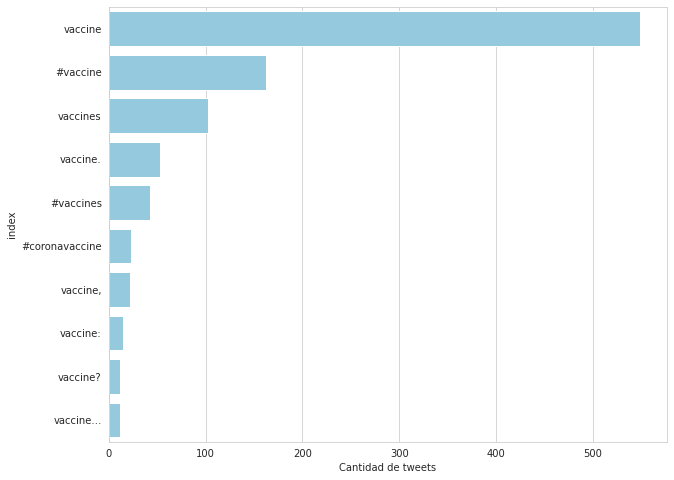

In [ ]:
# Barplot principales hashtags
hashtags = covid_tweets["hashtags"].str.lower().str.split()
hashtags = hashtags.explode().value_counts().reset_index(name="counts").head(10)

sns.set_style("whitegrid")
plt.figure(figsize=(10,8))
ax = sns.barplot(x="counts", y="index", data=hashtags, color="skyblue")
ax.set_xlabel("Cantidad de tweets")
ax.set_ylabel("Hashtags")
ax.set_title("Cantidad de tweets por hashtag relevante para la pandemia de COVID-19")
plt.show()

# Barplot palabras clave
mentions = covid_tweets["text"].str.lower().str.split()
mentions = mentions.explode().str.strip().value_counts().reset_index(name="counts")
mentions = mentions[mentions["index"].str.contains("vacuna|vacunas|vaccine|vacunación", case=False)].head(10)

sns.set_style("whitegrid")
plt.figure(figsize=(10,8))
ax = sns.barplot(x="counts", y="index", data=mentions, color="skyblue")
ax.set_xlabel("Cantidad de tweets")
ax.set

user_location          \nˢᵒᵐᵉʷʰᵉʳᵉ\n🖤          Cathlamet, Wa.  \
contains_vaccine_info                                           
False                               2  8                    1   
True                                0  0                    0   

user_location             Canada 🇨🇦🍁🛶🌲     WorldWide    Shropshire England   \
contains_vaccine_info                                                         
False                                1             1                      2   
True                                 0             0                      0   

user_location            Sunny Southern California    manchester England  \
contains_vaccine_info                                                      
False                                            6                     1   
True                                             0                     0   

user_location           #NYC #Ohio #Maine #NOLA #VT   (From Detroit)  ...  \
contains_vaccine_info                   

/usr/local/lib/python3.9/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 128420 (\N{BLACK HEART}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.9/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 127987 (\N{WAVING WHITE FLAG}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.9/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 127752 (\N{RAINBOW}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.9/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.9/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 2325 (\N{DEVANAGARI LETTER KA}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.9/dist-packages/seaborn/utils.py:80: UserWarning: Matplotlib currently does not support Devanagari natively.
  fig.canvas.draw()
/usr/local/lib/python3.9/dist-packages/seaborn/utils.py:80: UserWarnin

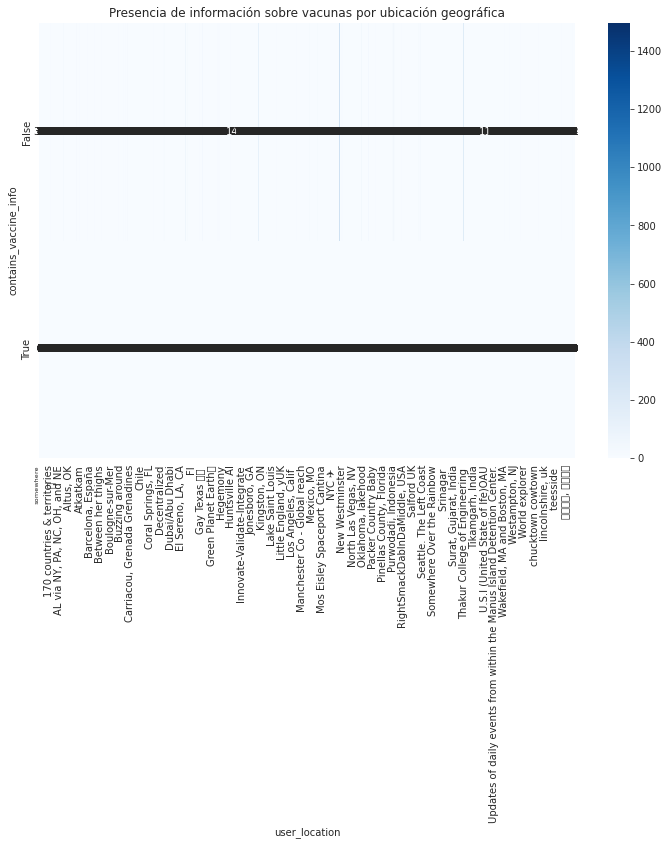

In [ ]:

df = df.dropna(subset=['user_location']) 

# Columna para identificar si el tweet contiene información sobre vacunas
df['contains_vaccine_info'] = df['text'].str.contains('vacuna|vacunas|vacunación', case=False)

contingency_table = pd.crosstab(df['contains_vaccine_info'], df['user_location'])
print(contingency_table)

# Heatmap
plt.figure(figsize = (12,8))
sns.heatmap(contingency_table, cmap='Blues', annot=True, fmt='d')
plt.title('Presencia de información sobre vacunas por ubicación geográfica')
plt.show()


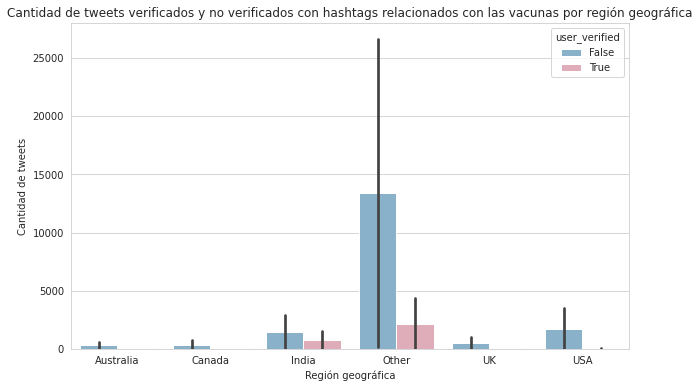

In [ ]:
# Columna para los hashtags relacionados con las vacunas
df = df.dropna(subset=['hashtags']) 
df = df[df['user_location'].notna()] 
df = df[df['user_verified'].notna()] 
df['vaccine_related'] = df['hashtags'].apply(lambda x: 'vaccine' in x.lower()) #Nueva columna para indicar si los hashtags están relacionados con las vacunas

# Crear una función para determinar la región geográfica del usuario
def get_region(location):
    if 'usa' in location.lower() or 'united states' in location.lower():
        return 'USA'
    elif 'uk' in location.lower() or 'united kingdom' in location.lower():
        return 'UK'
    elif 'canada' in location.lower():
        return 'Canada'
    elif 'australia' in location.lower():
        return 'Australia'
    elif 'india' in location.lower():
        return 'India'
    else:
        return 'Other'

df['region'] = df['user_location'].apply(get_region)

# Agrupar los datos por región geográfica, verificación de usuario y si los hashtags están relacionados con las vacunas
grouped = df.groupby(['region', 'user_verified', 'vaccine_related'])['hashtags'].count().reset_index()

#Grafico
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped, x='region', y='hashtags', hue='user_verified', palette=['#7FB3D5', '#E7A4B5'])
plt.title('Cantidad de tweets verificados y no verificados con hashtags relacionados con las vacunas por región geográfica')
plt.ylabel('Cantidad de tweets')
plt.xlabel('Región geográfica')
plt.show()

In [ ]:
# Ejemplo de creación de la columna "sentimiento" utilizando una lista de palabras clave
palabras_positivas = ['bien', 'efectiva', 'excelente']
palabras_negativas = ['malo', 'inefectiva', 'peligroso']
df['sentimiento'] = df['text'].apply(lambda x: 'positivo' if any(word in x for word in palabras_positivas) else ('negativo' if any(word in x for word in palabras_negativas) else 'neutral'))


In [ ]:
df = df[df['text'].str.contains('vacuna')]


In [ ]:
df_grupo = df.groupby(['user_location', 'sentimiento']).count()['text'].reset_index()


ValueError: ignored

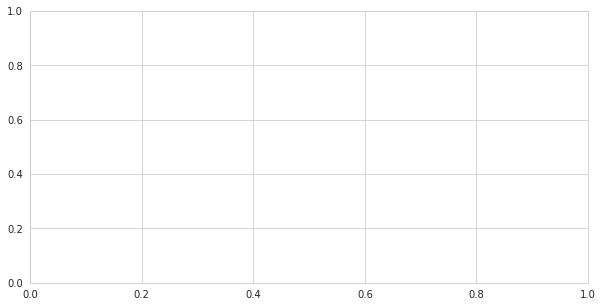

In [ ]:
ubicaciones_comunes = df_grupo.groupby('user_location').sum().sort_values('text', ascending=False).head(5).index.tolist()
df_grupo_filtrado = df_grupo[df_grupo['user_location'].isin(ubicaciones_comunes)]

fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.barplot(x='user_location', y='text', hue='sentimiento', data=df_grupo_filtrado)
ax.set_xlabel('Ubicación del usuario')
ax.set_ylabel('Número de tweets')
ax.set_title('Popularidad de los tweets sobre vacunas por ubicación y sentimiento')
plt.show()

Erick Trinidad Limón Ace A01735902 
S (específico) - Se busca analizar los patrones de comportamiento de los usuarios en las redes sociales y compararlos con los dispositivos utilizados para publicar contenido, con el fin de obtener una mejor comprensión de su actividad en la plataforma. M (medible) - El progreso del proyecto se medirá según la cantidad de datos procesados y la identificación de los usuarios más activos y comprometidos en la plataforma. A (alcanzable) - La meta es realista y alcanzable dado que se basa en la recopilación y análisis de datos existentes en la plataforma. Se utilizarán herramientas y técnicas disponibles para la visualización y análisis de los datos. R (relevante) - La meta es relevante debido a que ayuda a mejorar y aumentar el engagement en la plataforma de redes sociales además de ayudar a comprender mejor el comportamiento de los usuarios en Twitter. La visualización de las diferencias entre followers y sources de los tweets puede proporcionar información valiosa sobre los patrones de uso de Twitter. T (marco de tiempo) - La meta debe realizarse antes del día 24 de marzo del 2023 lo que da un tiempo de trabajo de aproximadamente 4 horas.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

# cargar el archivo de datos
df = pd.read_csv('sample_data/covid19_tweets.csv', delimiter=';', encoding='utf-8')


# crear la matriz de correlación
corrmat = df.corr()

# crear una máscara para eliminar la mitad superior de la matriz de correlación
mask = np.triu(np.ones_like(corrmat, dtype=bool))

# crear un mapa de calor con la matriz de correlación y la máscara
sns.heatmap(corrmat, mask=mask, annot=True)

# mostrar el mapa de calor
plt.show()


ParserError: ignored

In [ ]:
df['source'].value_counts().nlargest(5)

NameError: ignored

In [ ]:
plt.figure(figsize=(20,10))
df['source'].value_counts().nlargest(10).plot(kind='bar')
plt.xticks(rotation=45)
plt.show()

In [ ]:
df2 = df[df["source"] == "Twitter Web App"]
corrmat = df2.corr()
sns.heatmap(corrmat, annot=True)
plt.show()

In [ ]:
df2 = df[df["source"] == "Twitter for Android"]
corrmat = df2.corr()
sns.heatmap(corrmat, annot=True)
plt.show()

In [ ]:
df2 = df[df["source"] == "Twitter for iPhone"]
corrmat = df2.corr()
sns.heatmap(corrmat, annot=True)
plt.show()

In [ ]:
df2 = df[df["source"] == "Twitter Web App"]
df2.hist(figsize=(20,15))
plt.show()

In [ ]:
df2 = df[df["source"] == "Twitter for Android"]
df2.hist(figsize=(20,15))
plt.show()

In [ ]:
df2 = df[df["source"] == "Twitter for iPhone"]
df2.hist(figsize=(15,8))
plt.show()

In [ ]:
plt.figure(figsize=(20,10))
df['user_name'].value_counts().nlargest(10).plot(kind='bar')
plt.xticks(rotation=45)
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df2 = df[df['source'].isin(df['source'].value_counts().nlargest(10).index)]
table = pd.crosstab(df2['source'], df2['user_name'])
table = table.loc[:, table.sum(axis=0) >= 10] # solo incluir usuarios con al menos 10 publicaciones

fig, ax = plt.subplots(figsize=(10, 10))
for user in table.columns:
    ax.scatter(table.index, [user] * len(table), s=table[user], label=user)
ax.set_xlabel('Source')
ax.set_ylabel('User')
ax.legend()
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

top_users = df.groupby('user_name')['user_followers'].max().nlargest(10)
df2 = df[df['user_name'].isin(top_users.index)]
df2 = df2[df2['source'].isin(df2['source'].value_counts().nlargest(5).index)]
table = pd.crosstab(df2['source'], df2['user_name'])

fig, ax = plt.subplots(figsize=(10, 10))
for user in table.columns:
    ax.scatter(table.index, [user] * len(table), s=table[user], label=user)
ax.set_xlabel('Source')
ax.set_ylabel('User')
ax.legend()
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

top_users = df.groupby('user_name')['user_followers'].max().nlargest(10)
df2 = df[df['user_name'].isin(top_users.index)]
df2 = df2[df2['source'].isin(df2['source'].value_counts().nlargest(10).index)]
table = pd.crosstab(df2['source'], df2['user_name'])
table = table[top_users.index]

fig, ax = plt.subplots(figsize=(10, 10))
for i, user in enumerate(table.columns):
    ax.barh(range(len(table)), table[user], height=0.8, left=table.iloc[:, :i].sum(axis=1), label=user)
ax.set_yticks(range(len(table)))
ax.set_yticklabels(table.index)
ax.set_xlabel('Number of posts')
ax.set_ylabel('Source')
ax.legend()
plt.show()

NameError: ignored